In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [ ]:
#lets describe the data
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [ ]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()

False

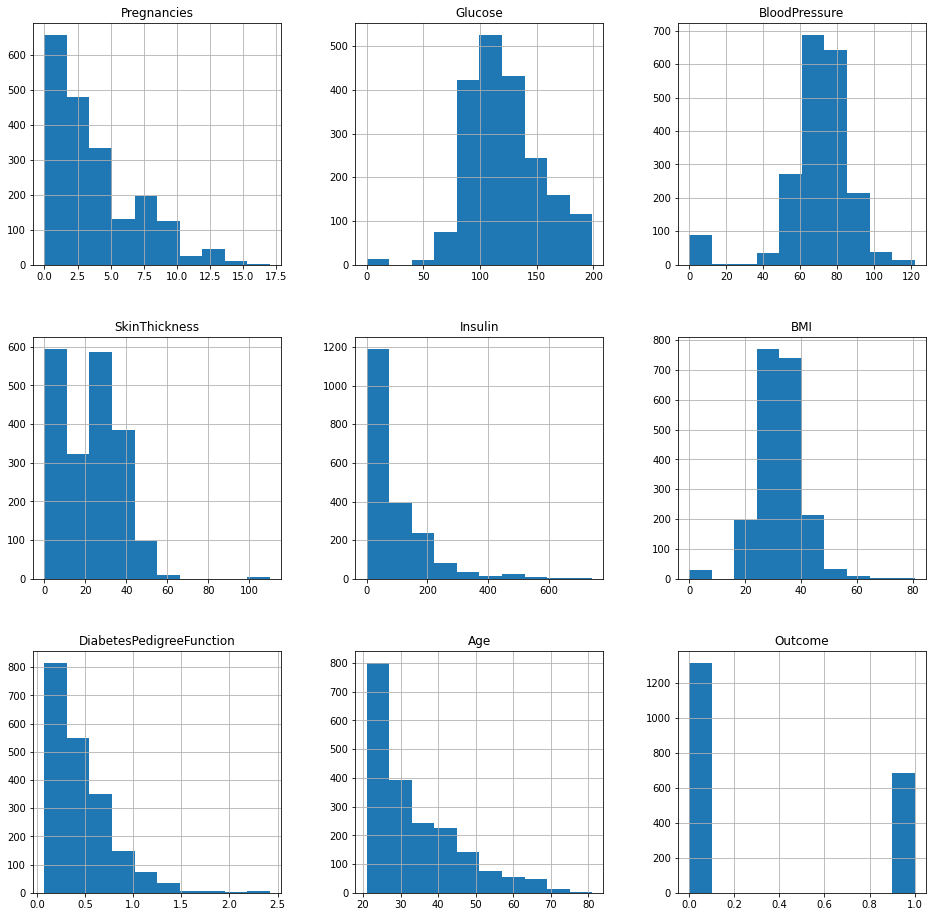

In [ ]:
#histogram
df.hist(figsize=(16,16))
plt.show()

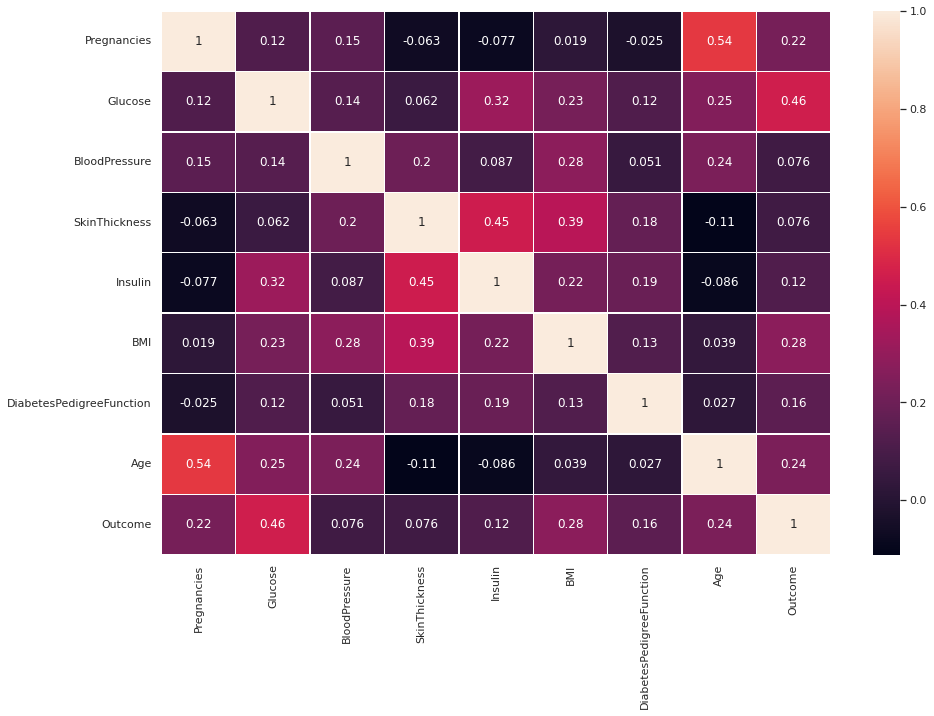

In [ ]:
#correlation
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(),linewidths=.5,annot=True)
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

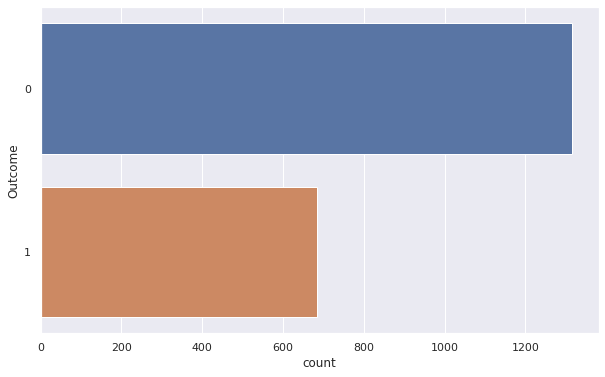

In [ ]:
#lets count total outcome in each target 0 1
#0 means no diabetes
#1 means patient with diabetes
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(y=df['Outcome'])

In [ ]:
l = df['Outcome']

In [ ]:
c0=0
for i in l:
    if i==0:
        c0+=1
print(c0)

1316


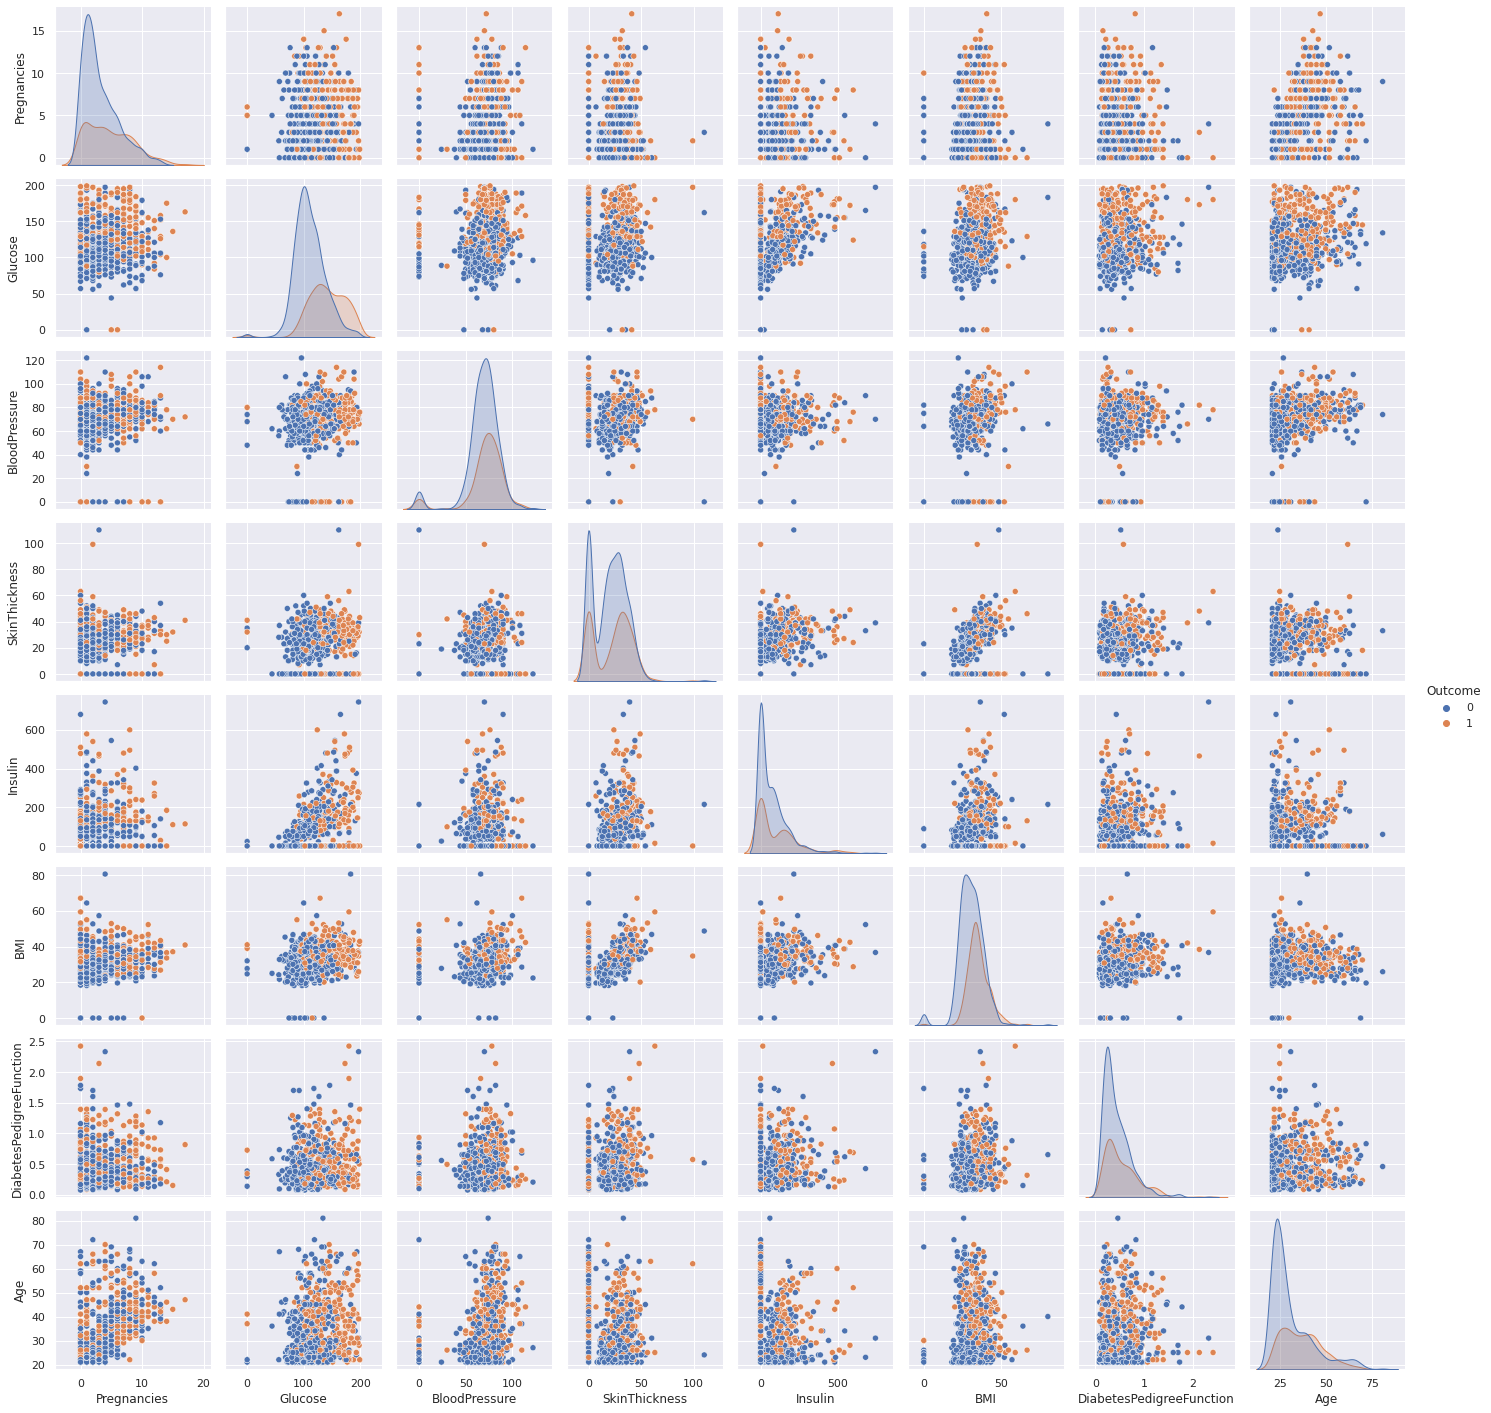

In [ ]:
sns.set(style="ticks")
sns.set(rc = {'figure.figsize':(15,10)})
sns.pairplot(df, hue="Outcome")

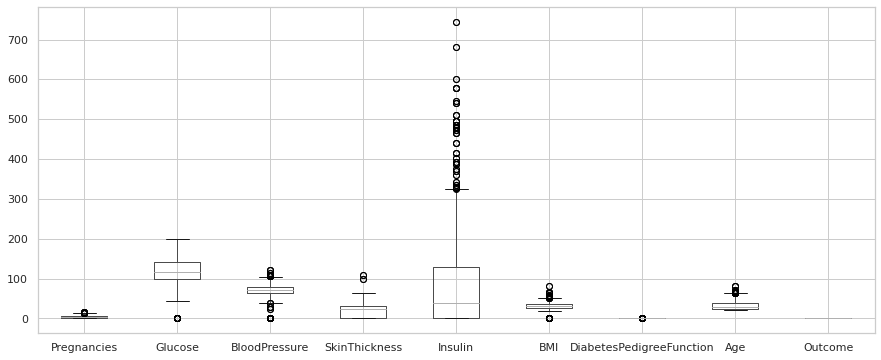

In [ ]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

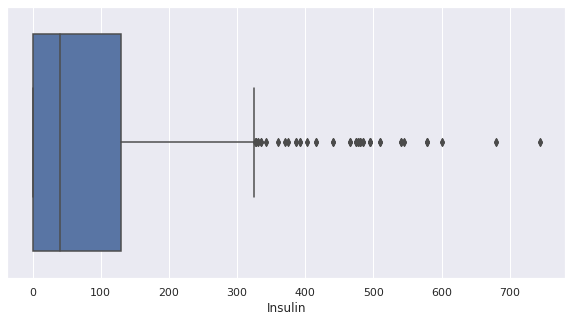

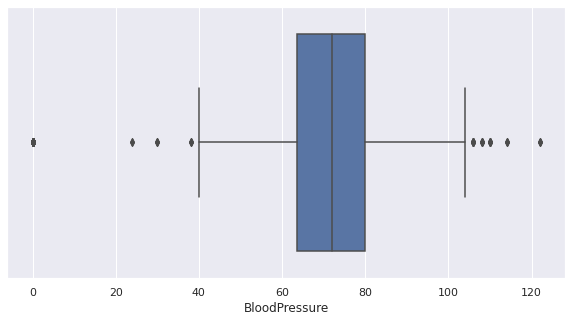

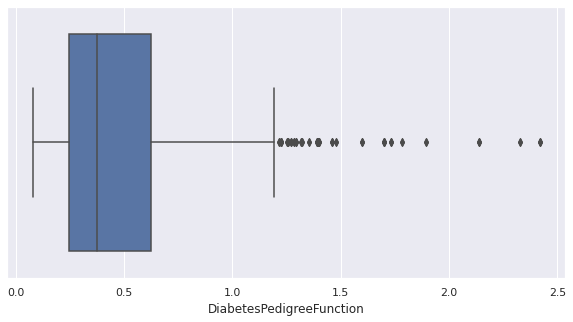

In [ ]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [ ]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))


---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [ ]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((2000, 9), (1652, 9))

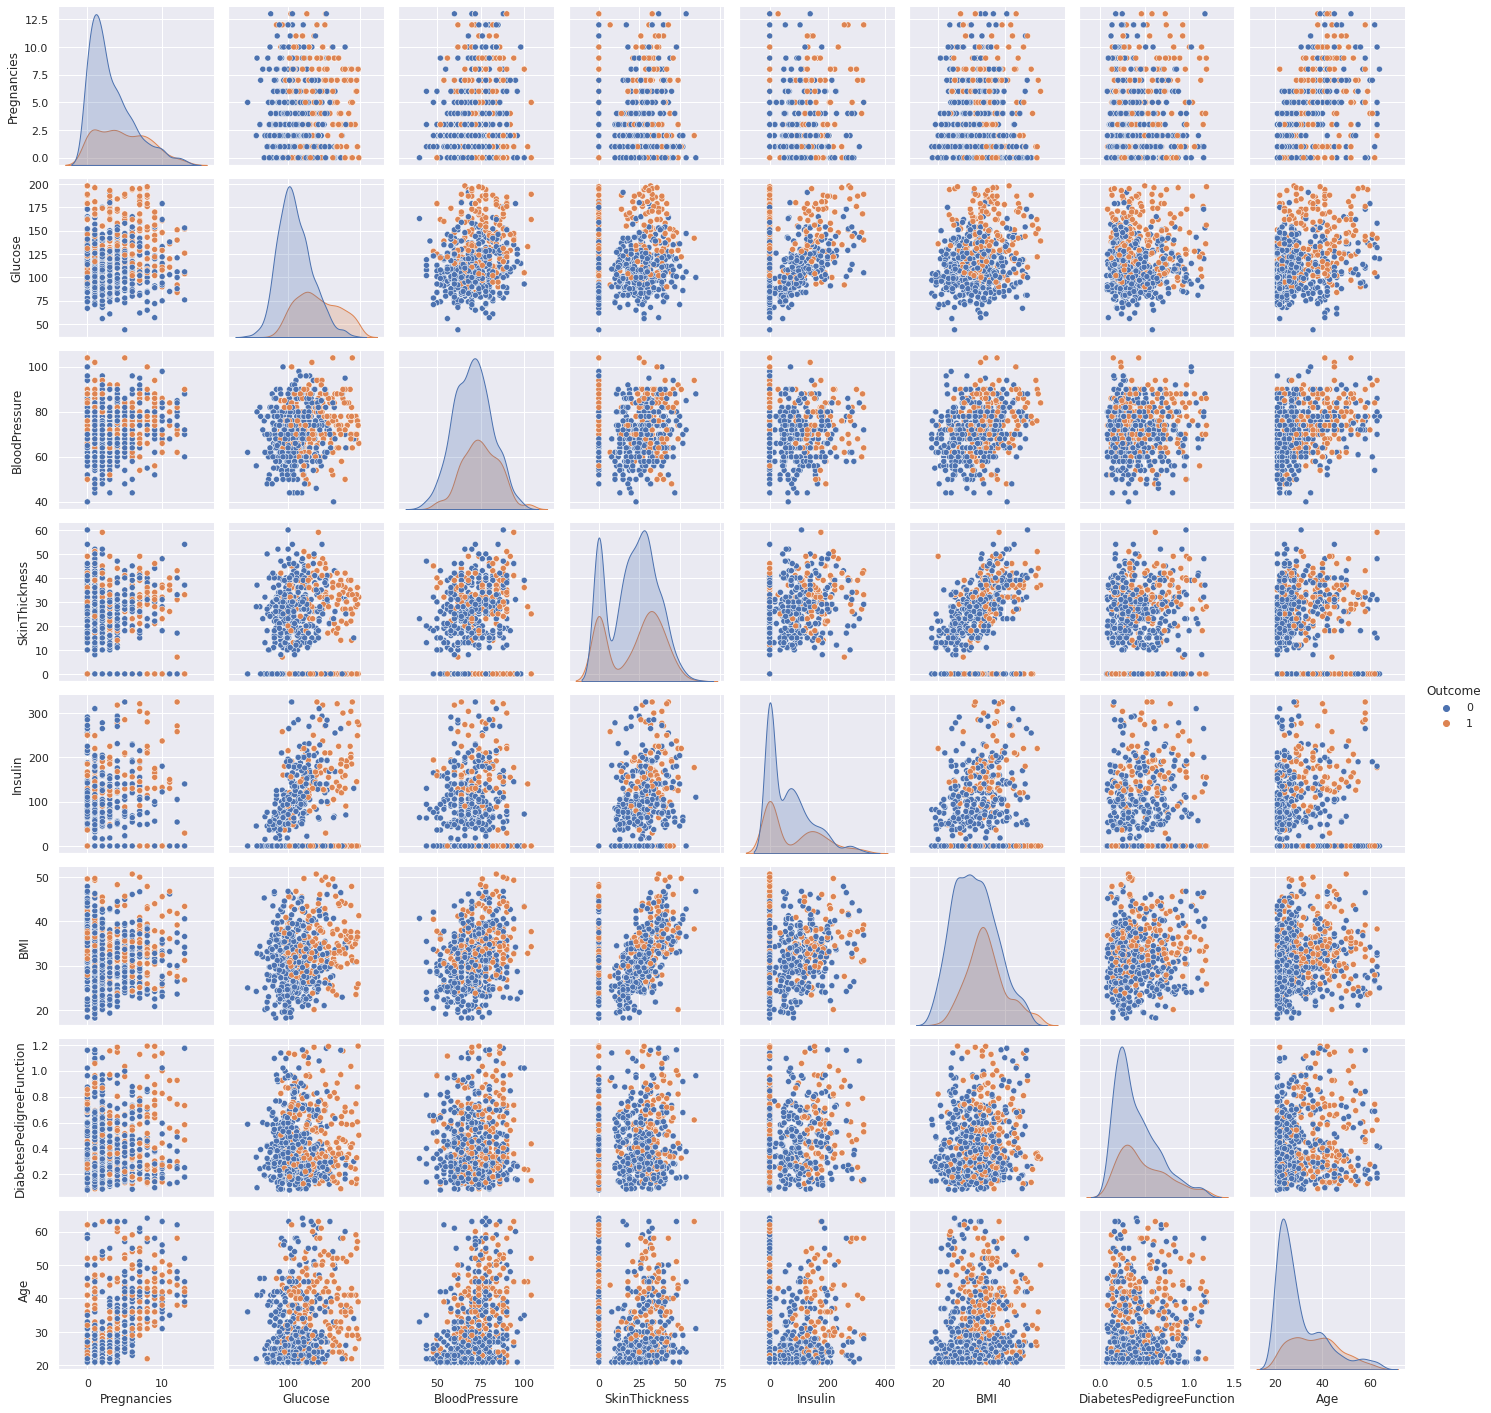

In [ ]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.set(rc = {'figure.figsize':(15,10)})
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [ ]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
Y=df_out['Outcome']

In [ ]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

In [ ]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve
from statistics import mean
import matplotlib.pyplot as plt

acc=[]
roc=[]
f1_scr=[]
L1_loss=[]

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

#Loss Funtion
def loss( y, y_pred ) :      
    return np.sum( np.abs( y - y_pred ) ) / np.size( y )
    #return mean_absolute_error(y, y_pred)

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])
    print("Confusion Matrix with Mean Values :") 
    print("TP : {0}\tTN : {1}\tFP : {2}\tFN : {3}".format(result['test_tp'].mean(),result['test_tn'].mean(),result['test_fp'].mean(),result['test_fn'].mean()))


def display_sensitivity_specificity_accpercent(result):    
    cm={}
    cm['tp1']=list(result['test_tp'])
    cm['tn1']=list(result['test_tn'])
    cm['fn1']=list(result['test_fn'])
    cm['fp1']=list(result['test_fp'])  
    sens=[]
    speci=[]
    acc_new = []
    
    for i in range(10):
        sens.append(cm['tp1'][i]/(cm['fn1'][i]+cm['tp1'][i]))
        speci.append(cm['tn1'][i]/(cm['fp1'][i]+cm['tn1'][i]))
        acc_new.append((cm['tn1'][i]+cm['tp1'][i])/(cm['tp1'][i]+cm['tn1'][i]+cm['fn1'][i]+cm['fp1'][i]))
    print("\nSensitivity : {0}  \nSpecificity : {1}  \nAccuracy : {2}".format(sens,speci,acc_new))
    print("Mean Sensitivity : {0} \nMean Specificity : {1} \nMean Accuracy : {2}".format(mean(sens),mean(speci),mean(acc_new)))

In [ ]:
def fn_abs(l):
    for i in range(len(l)):
        l[i] = abs(l[i])
    return l

def learning_curve_plot(estimator,str1):
    train_sizes, train_scores, test_scores = learning_curve(estimator,train_X,train_y,scoring='accuracy',cv=10, n_jobs=-1, train_sizes=np.linspace(0.05, 1.0, 25))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.subplots(1, figsize=(12,6))
    plt.plot(train_sizes, train_mean, 'o-', color="g",  label="Training score",linewidth=1.5)
    plt.plot(train_sizes, test_mean,'o-', color="r", label="Cross-validation score",linewidth=1.5)
    plt.title("Learning Curve of "+str1+" model" )
    plt.xlabel("Training examples",fontweight = 'bold'), plt.ylabel("Accuracy Score",fontweight = 'bold'), plt.legend(loc="best")  
    plt.show()

def loss_curve_plot(estimator,str1):
    train_sizes, train_scores, test_scores = learning_curve(estimator,train_X,train_y,  scoring='neg_mean_absolute_error',cv=10, n_jobs=-1, train_sizes=np.linspace(0.05, 1.0, 25))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    train_mean = fn_abs(train_mean)
    test_mean = fn_abs(test_mean)
    plt.subplots(1, figsize=(12,6))
    plt.plot(train_sizes, train_mean, 'o-', color="g",  label="Training loss",linewidth=1.5)
    plt.plot(train_sizes, test_mean,'o-', color="r", label="Mean Absolute loss",linewidth=1.5)
    plt.title("Loss Curve of "+str1+" model" )
    plt.xlabel("Training examples",fontweight = 'bold'), plt.ylabel("Mean Absolute Loss",fontweight = 'bold'), plt.legend(loc="best")  
    #print(train_mean,    train_std ,    test_mean,    test_std)
    plt.show()
'''def curve(estimator,str1):
    train_sizes, train_scores, test_scores = learning_curve(estimator,train_X,train_y,scoring='accuracy',cv=10, n_jobs=-1, train_sizes=np.linspace(0.05, 1.0, 25))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.subplots(1, figsize=(12,6))
    plt.plot(train_sizes, train_mean, 'o-', color="g",  label="Training score",linewidth=1.5)
    plt.plot(train_sizes, test_mean,'o-', color="r", label="Cross-validation score",linewidth=1.5)

    train_sizes, train_scores, test_scores = learning_curve(estimator,train_X,train_y,  scoring='neg_mean_absolute_error',cv=10, n_jobs=-1, train_sizes=np.linspace(0.05, 1.0, 25))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    train_mean = fn_abs(train_mean)
    test_mean = fn_abs(test_mean)
    plt.plot(train_sizes, train_mean, 'o-', color="blue",  label="Training loss",linewidth=1.5)
    plt.plot(train_sizes, test_mean,'o-', color="brown", label="Mean Absolute loss",linewidth=1.5)
    plt.title("Accuracy and Loss Curve of "+str1+" model" )
    plt.xlabel("Training examples",fontweight = 'bold'), plt.ylabel("Accuracy score",fontweight = 'bold'), plt.legend(loc="best")  
    plt.show()'''

'def curve(estimator,str1):\n    train_sizes, train_scores, test_scores = learning_curve(estimator,train_X,train_y,scoring=\'accuracy\',cv=10, n_jobs=-1, train_sizes=np.linspace(0.05, 1.0, 25))\n    train_mean = np.mean(train_scores, axis=1)\n    train_std = np.std(train_scores, axis=1)\n    test_mean = np.mean(test_scores, axis=1)\n    test_std = np.std(test_scores, axis=1)\n    plt.subplots(1, figsize=(12,6))\n    plt.plot(train_sizes, train_mean, \'o-\', color="g",  label="Training score",linewidth=1.5)\n    plt.plot(train_sizes, test_mean,\'o-\', color="r", label="Cross-validation score",linewidth=1.5)\n\n    train_sizes, train_scores, test_scores = learning_curve(estimator,train_X,train_y,  scoring=\'neg_mean_absolute_error\',cv=10, n_jobs=-1, train_sizes=np.linspace(0.05, 1.0, 25))\n    train_mean = np.mean(train_scores, axis=1)\n    train_std = np.std(train_scores, axis=1)\n    test_mean = np.mean(test_scores, axis=1)\n    test_std = np.std(test_scores, axis=1)\n    train_mean =

In [ ]:
#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression

LR_model=LogisticRegression(solver='lbfgs', max_iter=1000)
LR_model.fit(train_X,train_y)
y_pred=LR_model.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(LR_model,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

#L1_Loss
l1loss = loss(test_y, y_pred)
display_result(result)
print("\nAccuracy Score : {0}  ROC : {1}  F1_score : {2}  MAE_Loss : {3}".format(ac,rc,f1score,l1loss))

display_sensitivity_specificity_accpercent(result)
print("Accuracy percentage : ",round((ac*100), 2)," %")
f1_scr.append(f1score)
L1_loss.append(l1loss)



#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

TP:  [17 20 24 20 20 18 24 27 29 18]
TN:  [82 81 88 87 81 84 84 86 87 82]
FN:  [23 20 16 20 20 22 16 13 10 21]
FP:  [11 11  4  5 11  8  8  6  6 11]
Confusion Matrix with Mean Values :
TP : 21.7	TN : 84.2	FP : 8.1	FN : 18.1

Accuracy Score : 0.7371601208459214  ROC : 0.6842723004694836  F1_score : 0.5756097560975609  MAE_Loss : 0.2628398791540785

Sensitivity : [0.425, 0.5, 0.6, 0.5, 0.5, 0.45, 0.6, 0.675, 0.7435897435897436, 0.46153846153846156]  
Specificity : [0.8817204301075269, 0.8804347826086957, 0.9565217391304348, 0.9456521739130435, 0.8804347826086957, 0.9130434782608695, 0.9130434782608695, 0.9347826086956522, 0.9354838709677419, 0.8817204301075269]  
Accuracy : [0.7443609022556391, 0.7651515151515151, 0.8484848484848485, 0.8106060606060606, 0.7651515151515151, 0.7727272727272727, 0.8181818181818182, 0.8560606060606061, 0.8787878787878788, 0.7575757575757576]
Mean Sensitivity : 0.5455128205128206 
Mean Specificity : 0.9122837774661057 
Mean Accuracy : 0.8017088174982911
Accura

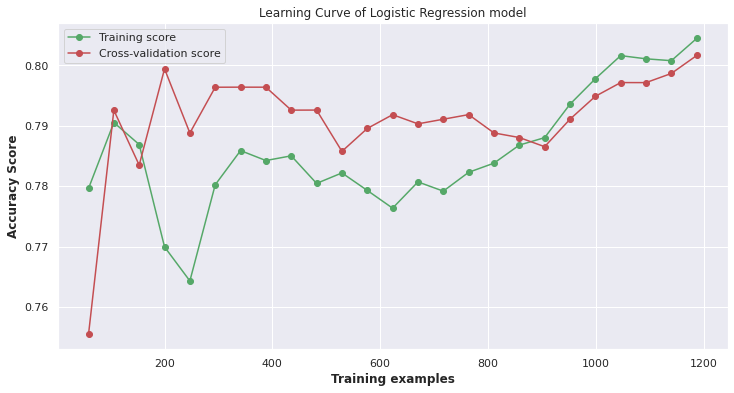

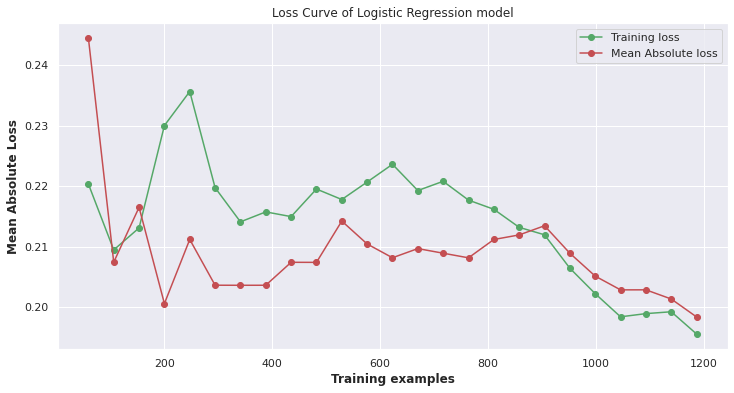

In [ ]:
learning_curve_plot(LR_model,"Logistic Regression")
loss_curve_plot(LR_model,"Logistic Regression")

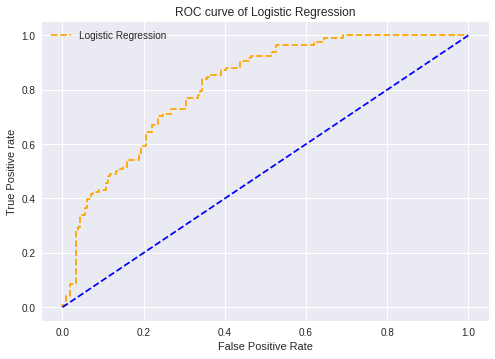

<Figure size 864x432 with 0 Axes>

In [ ]:
# ROC Curve for Logistic Regression
# predict probability of LR

pred_prob1 = LR_model.predict_proba(test_X)

# roc curve for LR Model

fpr1, tpr1, thresh1 = roc_curve(test_y, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(test_y, pred_prob1[:,1])


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve of Logistic Regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.figure(figsize=(12,6)) 

plt.savefig('ROC_LR',dpi=300)
plt.show();

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC

SVM_model=SVC(kernel='linear',probability=True)
SVM_model.fit(train_X,train_y)
y_pred=SVM_model.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(SVM_model,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

#L1_Loss
l1loss = loss(test_y, y_pred)

print("\nAccuracy : {0}  ROC : {1}  F1_score : {2}  L1_Loss : {3}".format(ac,rc,f1score,l1loss))

display_result(result)
f1_scr.append(f1score)
L1_loss.append(l1loss)
display_sensitivity_specificity_accpercent(result)
print("Accuracy percentage : ",round((ac*100), 2)," %")
#learning_curve_plot(SVM_model)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.743202416918429  ROC : 0.6832975252645819  F1_score : 0.5685279187817259  L1_Loss : 0.256797583081571
TP:  [19 19 24 20 18 19 23 27 28 18]
TN:  [81 81 88 87 83 86 85 84 88 82]
FN:  [21 21 16 20 22 21 17 13 11 21]
FP:  [12 11  4  5  9  6  7  8  5 11]
Confusion Matrix with Mean Values :
TP : 21.5	TN : 84.5	FP : 7.8	FN : 18.3

Sensitivity : [0.475, 0.475, 0.6, 0.5, 0.45, 0.475, 0.575, 0.675, 0.717948717948718, 0.46153846153846156]  
Specificity : [0.8709677419354839, 0.8804347826086957, 0.9565217391304348, 0.9456521739130435, 0.9021739130434783, 0.9347826086956522, 0.9239130434782609, 0.9130434782608695, 0.946236559139785, 0.8817204301075269]  
Accuracy : [0.7518796992481203, 0.7575757575757576, 0.8484848484848485, 0.8106060606060606, 0.7651515151515151, 0.7954545454545454, 0.8181818181818182, 0.8409090909090909, 0.8787878787878788, 0.7575757575757576]
Mean Sensitivity : 0.540448717948718 
Mean Specificity : 0.9155446470313231 
Mean Accuracy : 0.8024606971975393
Accuracy per

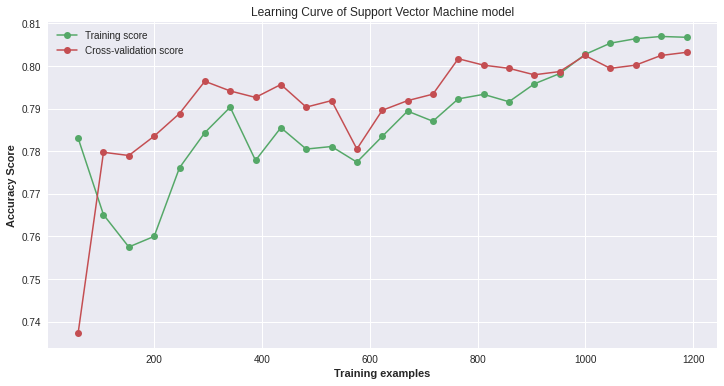

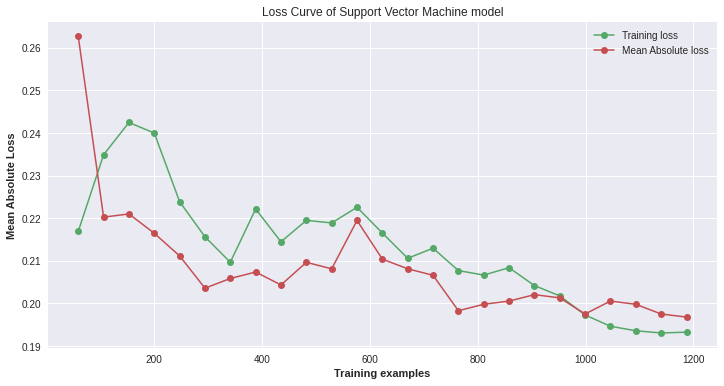

In [ ]:
learning_curve_plot(SVM_model,"Support Vector Machine")
loss_curve_plot(SVM_model,"Support Vector Machine")

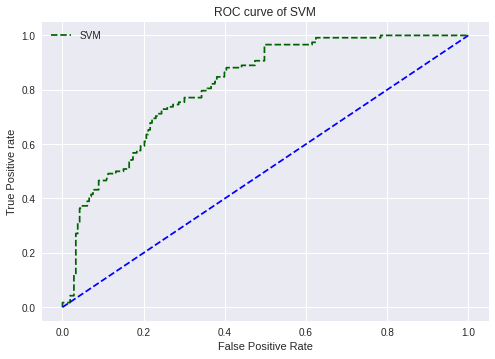

<Figure size 864x432 with 0 Axes>

In [ ]:
# predict probability of SVM
pred_prob2 = SVM_model.predict_proba(test_X)

# roc curve for SVM Model
fpr2, tpr2, thresh2 = roc_curve(test_y, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

# auc scores

auc_score2 = roc_auc_score(test_y, pred_prob2[:,1])

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='darkgreen', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve of SVM')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.figure(figsize=(12,6)) 

plt.savefig('ROC_SVM',dpi=300)
plt.show();

Minimum error : 0.12084592145015106 at K = 1


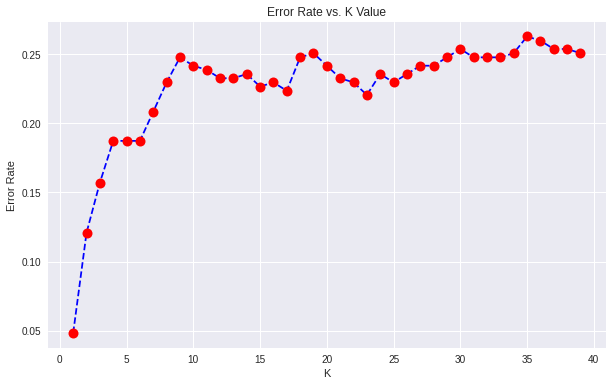

In [ ]:
#defining optimal function
def optimal(arr):  
  m = min(arr)
  if arr.index(m)!=0:
    return arr.index(m)
  else:
    m2 = min(arr[1::])
    return arr.index(m2)


# For KNN we plot a graph for error-rate VS K value
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_X,train_y)
 pred_i = knn.predict(test_X)
 error_rate.append(np.mean(pred_i != test_y))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
y = optimal(error_rate)
print("Minimum error :",error_rate[y],"at K =",y)
optimal_k_value = y

In [ ]:
#KNN with n_neighbours = optimal_k_value
knn_model=KNeighborsClassifier(n_neighbors = optimal_k_value)
knn_model.fit(train_X,train_y)
y_pred=knn_model.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(knn_model,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

#L1_Loss
l1loss = loss(test_y, y_pred)

print("\nAccuracy : {0}  ROC : {1}  F1_score : {2}  L1_Loss : {3}".format(ac,rc,f1score,l1loss))

display_result(result)
f1_scr.append(f1score)
L1_loss.append(l1loss)
display_sensitivity_specificity_accpercent(result)
print("Accuracy percentage : ",round((ac*100), 2)," %")

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.9516616314199395  ROC : 0.9359831304209436  F1_score : 0.9285714285714285  L1_Loss : 0.04833836858006042
TP:  [35 37 36 37 34 40 39 38 37 33]
TN:  [92 91 92 91 89 92 89 89 92 90]
FN:  [5 3 4 3 6 0 1 2 2 6]
FP:  [1 1 0 1 3 0 3 3 1 3]
Confusion Matrix with Mean Values :
TP : 36.6	TN : 90.7	FP : 1.6	FN : 3.2

Sensitivity : [0.875, 0.925, 0.9, 0.925, 0.85, 1.0, 0.975, 0.95, 0.9487179487179487, 0.8461538461538461]  
Specificity : [0.989247311827957, 0.9891304347826086, 1.0, 0.9891304347826086, 0.967391304347826, 1.0, 0.967391304347826, 0.967391304347826, 0.989247311827957, 0.967741935483871]  
Accuracy : [0.9548872180451128, 0.9696969696969697, 0.9696969696969697, 0.9696969696969697, 0.9318181818181818, 1.0, 0.9696969696969697, 0.9621212121212122, 0.9772727272727273, 0.9318181818181818]
Mean Sensitivity : 0.9194871794871795 
Mean Specificity : 0.9826671341748481 
Mean Accuracy : 0.9636705399863295
Accuracy percentage :  95.17  %


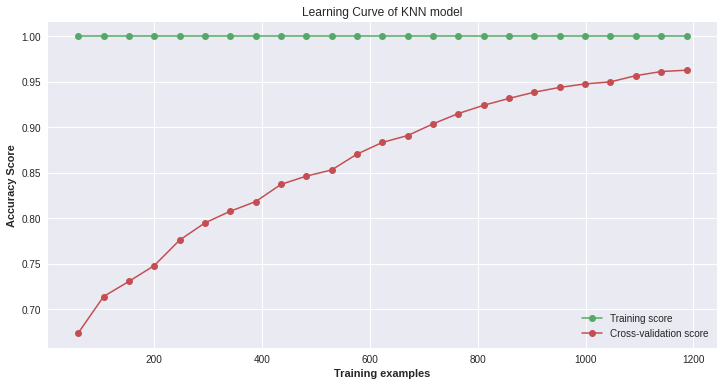

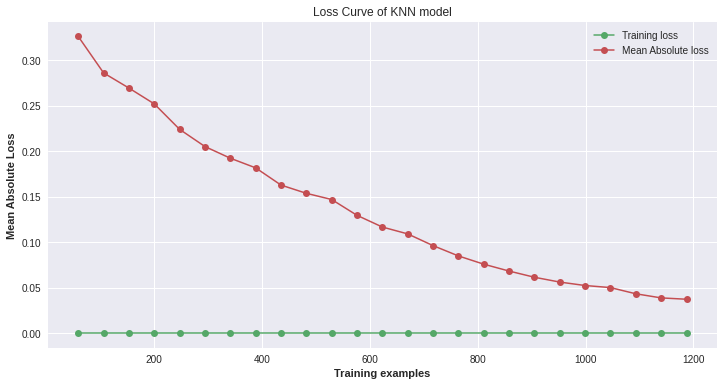

In [ ]:
learning_curve_plot(knn_model,"KNN")
loss_curve_plot(knn_model,"KNN")

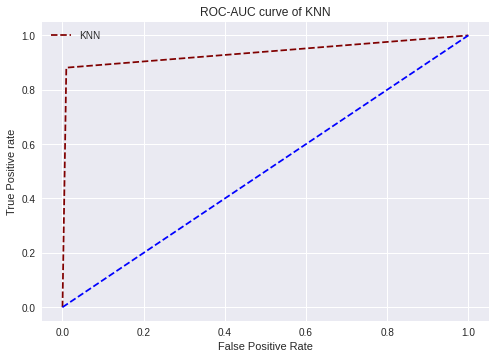

<Figure size 864x432 with 0 Axes>

In [ ]:
# predict probability of KNN
pred_prob3 = knn_model.predict_proba(test_X)

# roc curve for KNN Model
fpr3, tpr3, thresh3 = roc_curve(test_y, pred_prob3[:,1], pos_label=1)


# roc curve for tpr = fpr 
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

# auc scores
auc_score3 = roc_auc_score(test_y, pred_prob3[:,1])

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='maroon', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC-AUC curve of KNN')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.figure(figsize=(12,6)) 

plt.savefig('ROC_KNN',dpi=300)
plt.show();

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT_model=DecisionTreeClassifier(random_state=0)
DT_model.fit(train_X,train_y)
y_pred=DT_model.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(DT_model,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

#L1_Loss
l1loss = loss(test_y, y_pred)

print("\nAccuracy : {0}  ROC : {1}  F1_score : {2}  L1_Loss : {3}".format(ac,rc,f1score,l1loss))

display_result(result)
f1_scr.append(f1score)
L1_loss.append(l1loss)
display_sensitivity_specificity_accpercent(result)
print("Accuracy percentage : ",round((ac*100), 2)," %")

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.9486404833836858  ROC : 0.9393053234662212  F1_score : 0.9264069264069263  L1_Loss : 0.0513595166163142
TP:  [36 39 39 37 36 40 39 37 34 34]
TN:  [92 89 90 90 87 91 88 86 87 91]
FN:  [4 1 1 3 4 0 1 3 5 5]
FP:  [1 3 2 2 5 1 4 6 6 2]
Confusion Matrix with Mean Values :
TP : 37.1	TN : 89.1	FP : 3.2	FN : 2.7

Sensitivity : [0.9, 0.975, 0.975, 0.925, 0.9, 1.0, 0.975, 0.925, 0.8717948717948718, 0.8717948717948718]  
Specificity : [0.989247311827957, 0.967391304347826, 0.9782608695652174, 0.9782608695652174, 0.9456521739130435, 0.9891304347826086, 0.9565217391304348, 0.9347826086956522, 0.9354838709677419, 0.978494623655914]  
Accuracy : [0.9624060150375939, 0.9696969696969697, 0.9772727272727273, 0.9621212121212122, 0.9318181818181818, 0.9924242424242424, 0.9621212121212122, 0.9318181818181818, 0.9166666666666666, 0.946969696969697]
Mean Sensitivity : 0.9318589743589744 
Mean Specificity : 0.9653225806451613 
Mean Accuracy : 0.9553315105946685
Accuracy percentage :  94.86  %


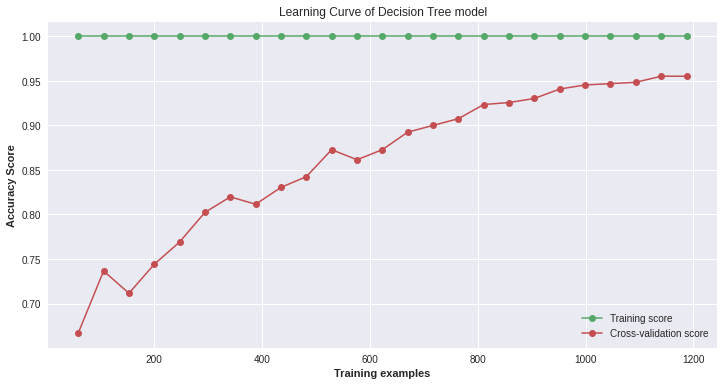

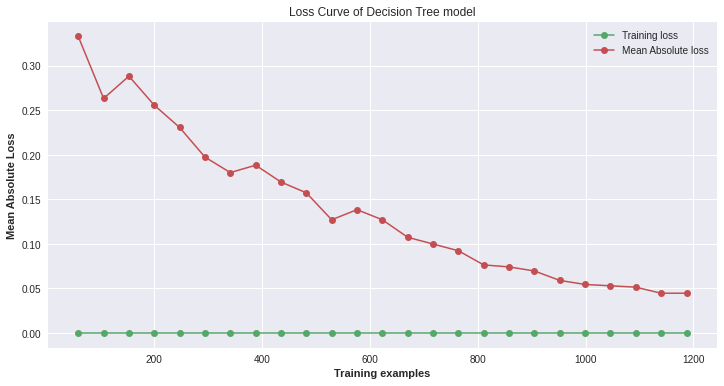

In [ ]:
learning_curve_plot(DT_model,"Decision Tree")
loss_curve_plot(DT_model,"Decision Tree")

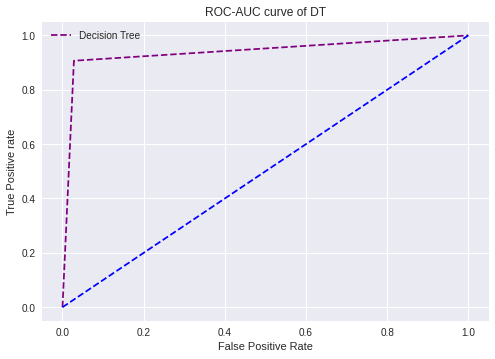

<Figure size 864x432 with 0 Axes>

In [ ]:
#Plotting of ROC-AUC curve
#Predict probability of Decision Tree

pred_prob4 = DT_model.predict_proba(test_X)
# roc curve for Decision Tree Models

fpr4, tpr4, thresh4 = roc_curve(test_y, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

# auc scores

auc_score4 = roc_auc_score(test_y, pred_prob4[:,1])
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC-AUC curve of DT')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.figure(figsize=(12,6)) 

plt.savefig('ROC_Decision_Tree',dpi=300)
plt.show();

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier()
RF_model.fit(train_X,train_y)
y_pred=RF_model.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(RF_model,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

#L1_Loss
l1loss = loss(test_y, y_pred)

print("\nAccuracy : {0}  ROC : {1}  F1_score : {2}  L1_Loss : {3}".format(ac,rc,f1score,l1loss))

display_result(result)
f1_scr.append(f1score)
L1_loss.append(l1loss)
display_sensitivity_specificity_accpercent(result)
print("Accuracy percentage : ",round((ac*100), 2)," %")

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.9425981873111783  ROC : 0.928940876899817  F1_score : 0.9162995594713658  L1_Loss : 0.05740181268882175
TP:  [36 39 39 39 35 40 39 38 39 33]
TN:  [91 91 92 91 90 92 91 88 90 90]
FN:  [4 1 1 1 5 0 1 2 0 6]
FP:  [2 1 0 1 2 0 1 4 3 3]
Confusion Matrix with Mean Values :
TP : 37.7	TN : 90.6	FP : 1.7	FN : 2.1

Sensitivity : [0.9, 0.975, 0.975, 0.975, 0.875, 1.0, 0.975, 0.95, 1.0, 0.8461538461538461]  
Specificity : [0.978494623655914, 0.9891304347826086, 1.0, 0.9891304347826086, 0.9782608695652174, 1.0, 0.9891304347826086, 0.9565217391304348, 0.967741935483871, 0.967741935483871]  
Accuracy : [0.9548872180451128, 0.9848484848484849, 0.9924242424242424, 0.9848484848484849, 0.946969696969697, 1.0, 0.9848484848484849, 0.9545454545454546, 0.9772727272727273, 0.9318181818181818]
Mean Sensitivity : 0.9471153846153846 
Mean Specificity : 0.9816152407667134 
Mean Accuracy : 0.971246297562087
Accuracy percentage :  94.26  %


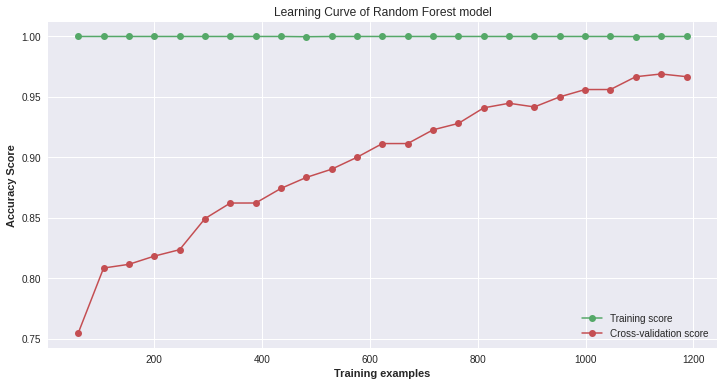

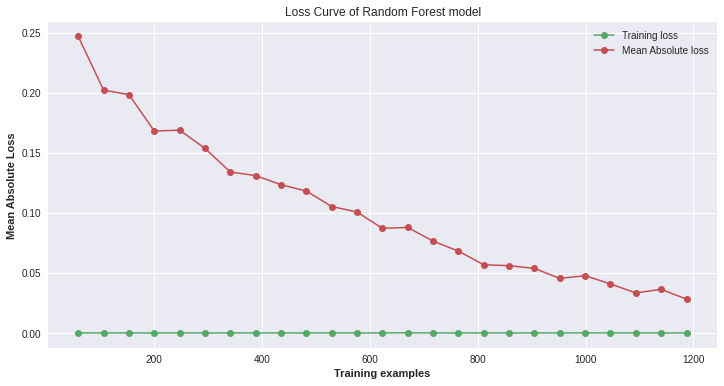

In [ ]:
learning_curve_plot(RF_model,"Random Forest")
loss_curve_plot(RF_model,"Random Forest")

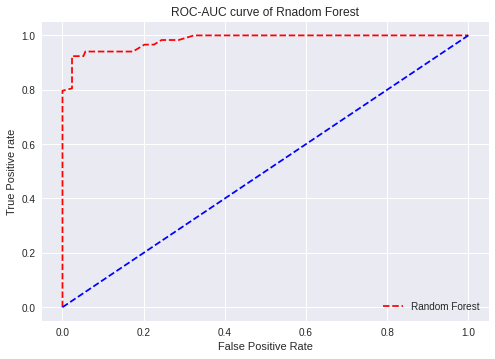

<Figure size 864x432 with 0 Axes>

In [ ]:
# predict probability of Random Forest
pred_prob5 = RF_model.predict_proba(test_X)

# roc curve for RF Models


fpr5, tpr5, thresh5 = roc_curve(test_y, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

# auc scores
auc_score5 = roc_auc_score(test_y, pred_prob5[:,1])


plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC-AUC curve of Rnadom Forest')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.figure(figsize=(12,6)) 

plt.savefig('ROC_RF',dpi=300)
plt.show();

In [ ]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

NB_model=GaussianNB()
NB_model.fit(train_X,train_y)
y_pred=NB_model.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(NB_model,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

#L1_Loss
l1loss = loss(test_y, y_pred)

print("\nAccuracy : {0}  ROC : {1}  F1_score : {2}  L1_Loss : {3}".format(ac,rc,f1score,l1loss))

display_result(result)
f1_scr.append(f1score)
L1_loss.append(l1loss)
display_sensitivity_specificity_accpercent(result)
print("Accuracy percentage : ",round((ac*100), 2)," %")

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.716012084592145  ROC : 0.6867390785390308  F1_score : 0.5948275862068965  L1_Loss : 0.283987915407855
TP:  [20 22 27 25 22 22 27 28 32 20]
TN:  [78 75 85 84 72 76 81 79 78 79]
FN:  [20 18 13 15 18 18 13 12  7 19]
FP:  [15 17  7  8 20 16 11 13 15 14]
Confusion Matrix with Mean Values :
TP : 24.5	TN : 78.7	FP : 13.6	FN : 15.3

Sensitivity : [0.5, 0.55, 0.675, 0.625, 0.55, 0.55, 0.675, 0.7, 0.8205128205128205, 0.5128205128205128]  
Specificity : [0.8387096774193549, 0.8152173913043478, 0.9239130434782609, 0.9130434782608695, 0.782608695652174, 0.8260869565217391, 0.8804347826086957, 0.8586956521739131, 0.8387096774193549, 0.8494623655913979]  
Accuracy : [0.7368421052631579, 0.7348484848484849, 0.8484848484848485, 0.8257575757575758, 0.7121212121212122, 0.7424242424242424, 0.8181818181818182, 0.8106060606060606, 0.8333333333333334, 0.75]
Mean Sensitivity : 0.6158333333333333 
Mean Specificity : 0.8526881720430107 
Mean Accuracy : 0.7812599681020733
Accuracy percentage :  71.

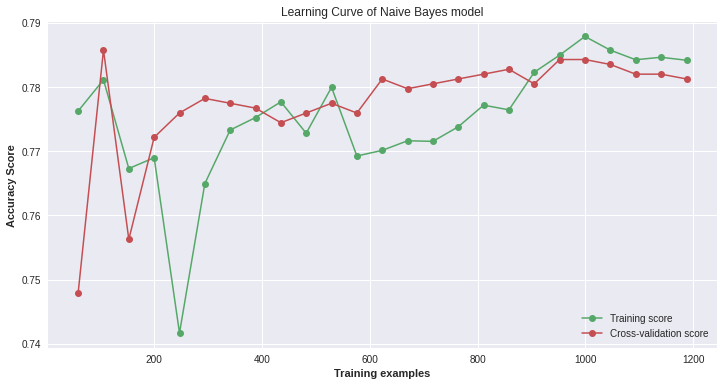

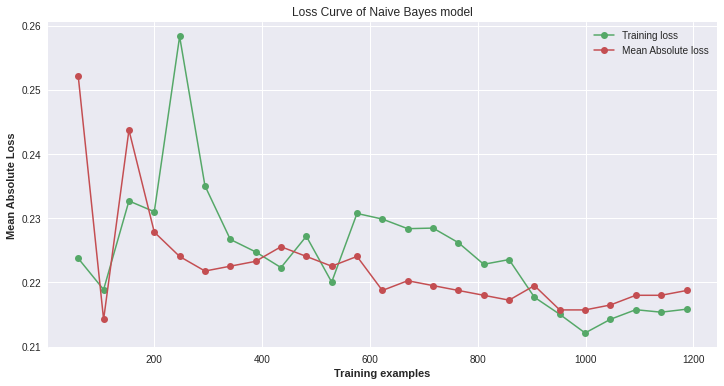

In [ ]:
learning_curve_plot(NB_model,"Naive Bayes")
loss_curve_plot(NB_model,"Naive Bayes")

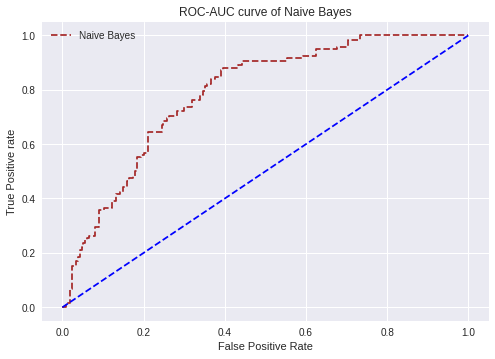

<Figure size 864x432 with 0 Axes>

In [ ]:
#Calculation of ROC-AUC curve
# predict probability of Naive Bayes

pred_prob6 = NB_model.predict_proba(test_X)

# roc curve for Naive Bayes Model

fpr6, tpr6, thresh6 = roc_curve(test_y, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

# auc scores

auc_score6 = roc_auc_score(test_y, pred_prob6[:,1])
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr6, tpr6, linestyle='--',color='brown', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC-AUC curve of Naive Bayes')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.figure(figsize=(12,6)) 

plt.savefig('ROC_Naive_Bayes',dpi=300)
plt.show();

Minimum error : 0.06042296072507553 at n_estimators = 180


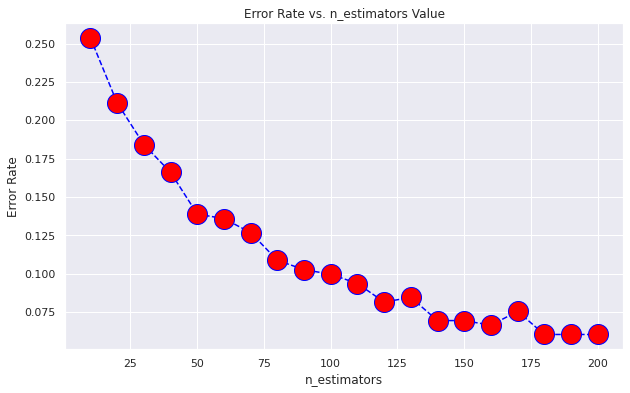

In [ ]:
# For Gradient Boost we plot a graph for error-rate VS n_estimators value keeping learning rate = 0.1
from sklearn.ensemble import GradientBoostingClassifier
error_rate = []
for i in range(10,201,10):
 gb = GradientBoostingClassifier(n_estimators=i,learning_rate=0.18)
 gb.fit(train_X,train_y)
 pred_i = gb.predict(test_X)
 error_rate.append(np.mean(pred_i != test_y))

plt.figure(figsize=(10,6))
plt.plot(range(10,201,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=20)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
print("Minimum error :",min(error_rate),"at n_estimators =",(error_rate.index(min(error_rate))+1)*10)
optimal_n_estimator_value = (error_rate.index(min(error_rate))+1)*10

In [ ]:
#Gradient Boosting Classifier
#from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier(n_estimators=optimal_n_estimator_value,learning_rate=0.18)
GB_model.fit(train_X,train_y)
y_pred=GB_model.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)


#cross val score
result=cross_validate(GB_model,train_X,train_y,scoring=scoring,cv=10)

#f1_score
f1score = f1_score(test_y, y_pred)

#L1_Loss
l1loss = loss(test_y, y_pred)

print("\nAccuracy : {0}  ROC : {1}  F1_score : {2}  L1_Loss : {3}".format(ac,rc,f1score,l1loss))

display_result(result)
f1_scr.append(f1score)
L1_loss.append(l1loss)
display_sensitivity_specificity_accpercent(result)
print("Accuracy percentage : ",round((ac*100), 2)," %")

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy : 0.9395770392749244  ROC : 0.9247035887642236  F1_score : 0.9115044247787611  L1_Loss : 0.06042296072507553
TP:  [36 37 39 36 34 38 38 38 35 32]
TN:  [91 90 92 91 86 92 90 86 92 89]
FN:  [4 3 1 4 6 2 2 2 4 7]
FP:  [2 2 0 1 6 0 2 6 1 4]
Confusion Matrix with Mean Values :
TP : 36.3	TN : 89.9	FP : 2.4	FN : 3.5

Sensitivity : [0.9, 0.925, 0.975, 0.9, 0.85, 0.95, 0.95, 0.95, 0.8974358974358975, 0.8205128205128205]  
Specificity : [0.978494623655914, 0.9782608695652174, 1.0, 0.9891304347826086, 0.9347826086956522, 1.0, 0.9782608695652174, 0.9347826086956522, 0.989247311827957, 0.956989247311828]  
Accuracy : [0.9548872180451128, 0.9621212121212122, 0.9924242424242424, 0.9621212121212122, 0.9090909090909091, 0.9848484848484849, 0.9696969696969697, 0.9393939393939394, 0.9621212121212122, 0.9166666666666666]
Mean Sensitivity : 0.9117948717948718 
Mean Specificity : 0.9739948574100047 
Mean Accuracy : 0.9553372066529962
Accuracy percentage :  93.96  %


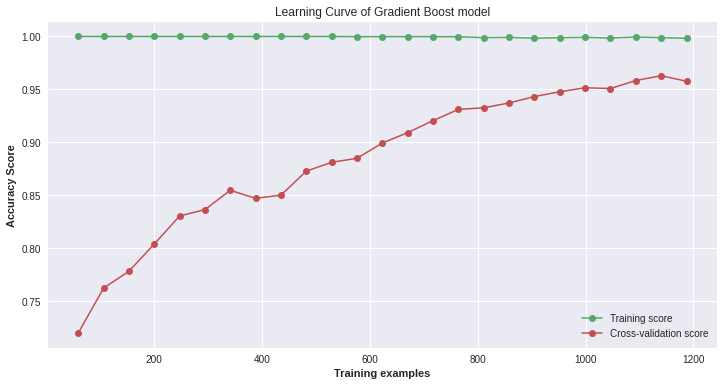

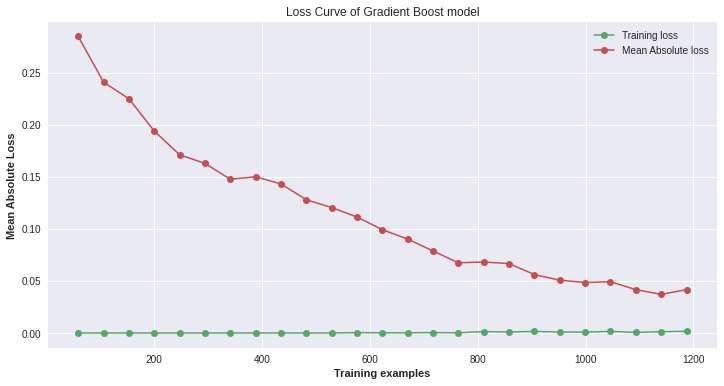

In [ ]:
learning_curve_plot(GB_model,"Gradient Boost")
loss_curve_plot(GB_model,"Gradient Boost")

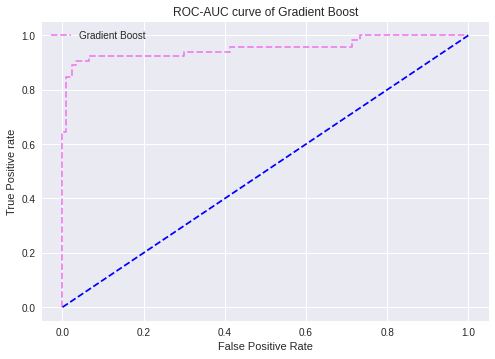

<Figure size 864x432 with 0 Axes>

In [ ]:
#Calculation of ROC-AUC curve
# predict probability of Gradient Boost
pred_prob7 = GB_model.predict_proba(test_X)

# roc curve for Gradient Boost Models
fpr7, tpr7, thresh7 = roc_curve(test_y, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 

p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

# auc scores

auc_score7 = roc_auc_score(test_y, pred_prob7[:,1])


plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr7, tpr7, linestyle='--',color='violet', label='Gradient Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC-AUC curve of Gradient Boost')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.figure(figsize=(12,6)) 

plt.savefig('ROC_GB',dpi=300)
plt.show();

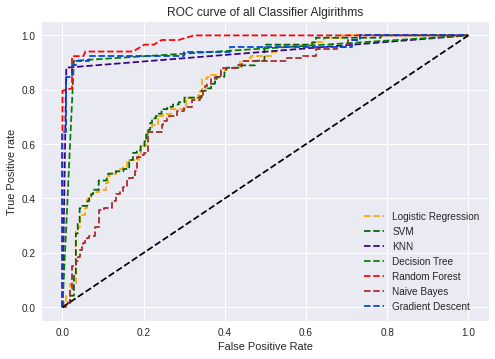

<Figure size 864x720 with 0 Axes>

In [ ]:
# plot combined roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='darkgreen', label='SVM')
plt.plot(fpr3, tpr3, linestyle='--',color='#380282', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='#008000', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr6, tpr6, linestyle='--',color='brown', label='Naive Bayes')
plt.plot(fpr7, tpr7, linestyle='--',color='#0343df', label='Gradient Descent')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve of all Classifier Algirithms')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.figure(figsize=(12,10)) 

plt.savefig('ROC')
plt.show();

In [ ]:
#Combining different algorithms with customised ensemble learning 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline


models = list()
'''
logistic = Pipeline([('m', LogisticRegression())])
models.append(('logistic', logistic))

sv = Pipeline([('m', SVC(kernel='linear'))])
models.append(('SVM', sv))

k_n_n = Pipeline([('m', KNeighborsClassifier(n_neighbors=25))])
models.append(('KNN', k_n_n))
'''
DT = Pipeline([('m', DecisionTreeClassifier(random_state=0))])
models.append(('Decision Tree', DT))

'''
nb = Pipeline([('m', GaussianNB())])
models.append(('Naive Bayes', nb))
'''

randomforest = Pipeline([('m', RandomForestClassifier())])
models.append(('randomforest', randomforest))

grad = Pipeline([('m', GradientBoostingClassifier(n_estimators=optimal_n_estimator_value,learning_rate=0.18))])
models.append(('gradient', grad))


ensemble = VotingClassifier(estimators=models, voting='hard')



In [ ]:
ensemble

VotingClassifier(estimators=[('Decision Tree',
                              Pipeline(steps=[('m',
                                               DecisionTreeClassifier(random_state=0))])),
                             ('randomforest',
                              Pipeline(steps=[('m',
                                               RandomForestClassifier())])),
                             ('gradient',
                              Pipeline(steps=[('m',
                                               GradientBoostingClassifier(learning_rate=0.18,
                                                                          n_estimators=180))]))])

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [ ]:
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ensemble,train_X,train_y,scoring='accuracy',cv=cv,n_jobs = -1)
pre = cross_val_score(ensemble,train_X,train_y,scoring='precision',cv=cv,n_jobs = -1)
recal = cross_val_score(ensemble,train_X,train_y,scoring='recall',cv=cv,n_jobs = -1)
n_f1scores = cross_val_score(ensemble,train_X,train_y,scoring='f1',cv=cv,n_jobs = -1)
n_roc_auc_scores = cross_val_score(ensemble,train_X,train_y,scoring='roc_auc',cv=cv,n_jobs = -1)
loss_scores = cross_val_score(ensemble,train_X,train_y,scoring='neg_mean_absolute_error',cv=cv,n_jobs = -1)
#Mean accuracy
ac=n_scores.mean()
acc.append(ac)

#Mean ROC_AOC score
rc=n_roc_auc_scores.mean()
roc.append(rc)

#Mean f1_score
f1score = n_f1scores.mean()

#L1_Loss
l1loss = abs(loss_scores.mean())
#log_loss
print("\nAccuracy : {0}  ROC : {1}  F1_score : {2}  L1_Loss : {3}".format(ac,rc,f1score,l1loss))
f1_scr.append(f1score)
L1_loss.append(l1loss)
print("Precision : ",pre)
print("Recall : ",recal)
display_sensitivity_specificity_accpercent(result)
print("Accuracy percentage : ",round((ac*100), 2)," %")



Accuracy : 0.9641774891774891  ROC : nan  F1_score : 0.9392319035654796  L1_Loss : 0.03733576365155312
Precision :  [0.88095238 0.9        0.97435897 0.95121951 0.95121951 0.88372093
 0.95       0.97368421 0.94594595 0.97435897 0.97222222 0.9
 0.95121951 0.95       0.94594595 0.94871795 0.95121951 1.
 0.97368421 0.97142857 0.94736842 0.91666667 0.975      0.97297297
 0.92857143 0.92857143 0.97435897 0.95121951 0.94736842 0.95      ]
Recall :  [0.95       0.9        0.95       0.975      0.975      0.95
 0.975      0.925      0.8974359  0.97435897 0.9        0.9
 0.975      0.95       0.875      0.95       0.975      0.8
 0.94871795 0.87179487 0.9        0.85       0.975      0.9
 0.975      0.975      0.95       0.975      0.92307692 0.97435897]

Sensitivity : [0.9, 0.925, 0.975, 0.9, 0.85, 0.95, 0.95, 0.95, 0.8974358974358975, 0.8205128205128205]  
Specificity : [0.978494623655914, 0.9782608695652174, 1.0, 0.9891304347826086, 0.9347826086956522, 1.0, 0.9782608695652174, 0.93478260869

In [ ]:
pre.mean()

0.9510251233415994

In [ ]:
recal.mean()

0.9296367521367521

In [ ]:
n_scores

array([0.93984962, 0.95454545, 0.97727273, 0.97727273, 0.97727273,
       0.93939394, 0.95454545, 0.96212121, 0.96212121, 1.        ,
       0.95488722, 0.9469697 , 0.96212121, 0.96212121, 0.9469697 ,
       0.96969697, 0.96969697, 0.93939394, 0.97727273, 0.9469697 ,
       0.94736842, 0.93181818, 0.98484848, 0.96212121, 0.96212121,
       0.96212121, 0.97727273, 0.98484848, 0.97727273, 0.98484848])

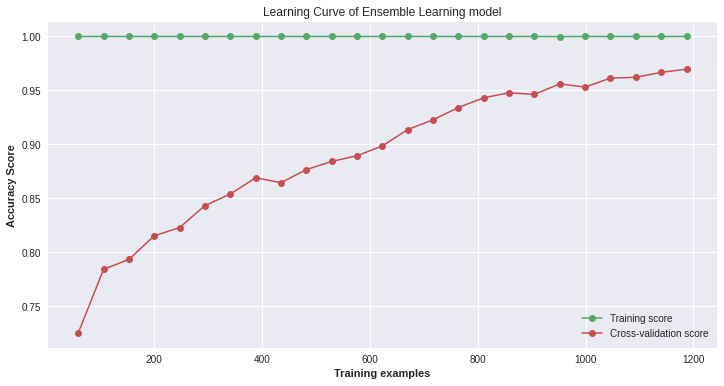

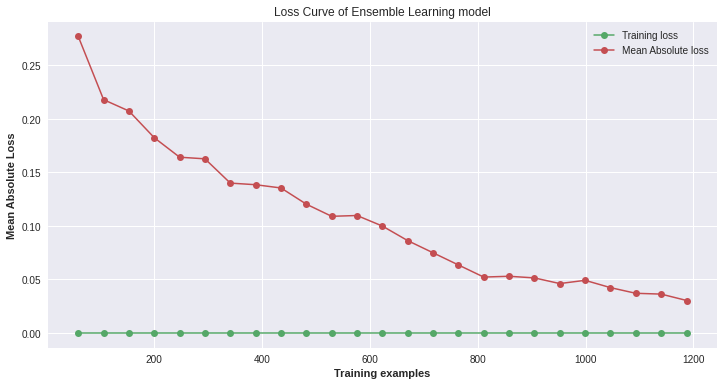

In [ ]:
learning_curve_plot(ensemble,"Ensemble Learning")
loss_curve_plot(ensemble,"Ensemble Learning")

In [ ]:
acc

[0.7371601208459214,
 0.743202416918429,
 0.9516616314199395,
 0.9486404833836858,
 0.9486404833836858,
 0.716012084592145,
 0.9395770392749244,
 0.963676236044657]

In [ ]:
roc

[0.6842723004694836,
 0.6832975252645819,
 0.9359831304209436,
 0.9393053234662212,
 0.9374154531710034,
 0.6867390785390308,
 0.9247035887642236,
 nan]

In [ ]:
f1_scr

[0.5756097560975609,
 0.5685279187817259,
 0.9285714285714285,
 0.9264069264069263,
 0.925764192139738,
 0.5948275862068965,
 0.9115044247787611,
 0.9401306914240208]

In [ ]:
L1_loss

[0.2628398791540785,
 0.256797583081571,
 0.04833836858006042,
 0.0513595166163142,
 0.0513595166163142,
 0.283987915407855,
 0.06042296072507553,
 0.03506113769271664]

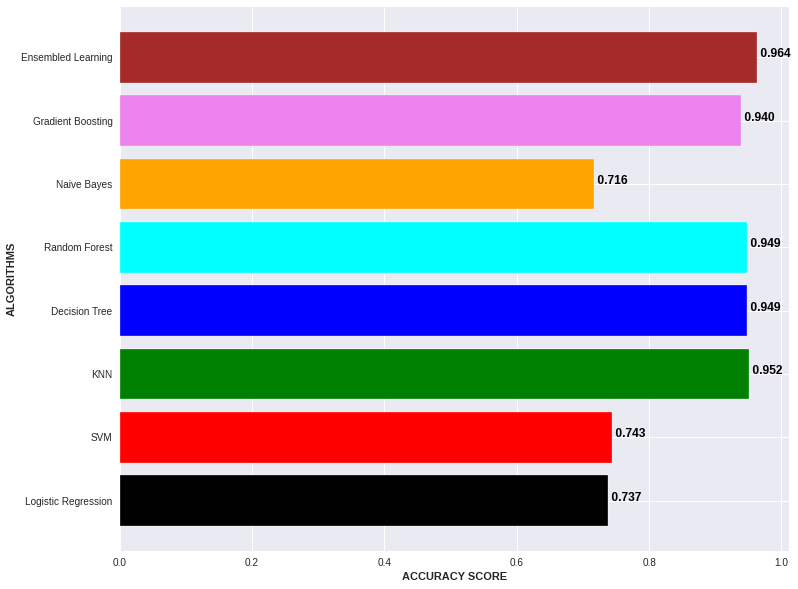

posx and posy should be finite values


posx and posy should be finite values


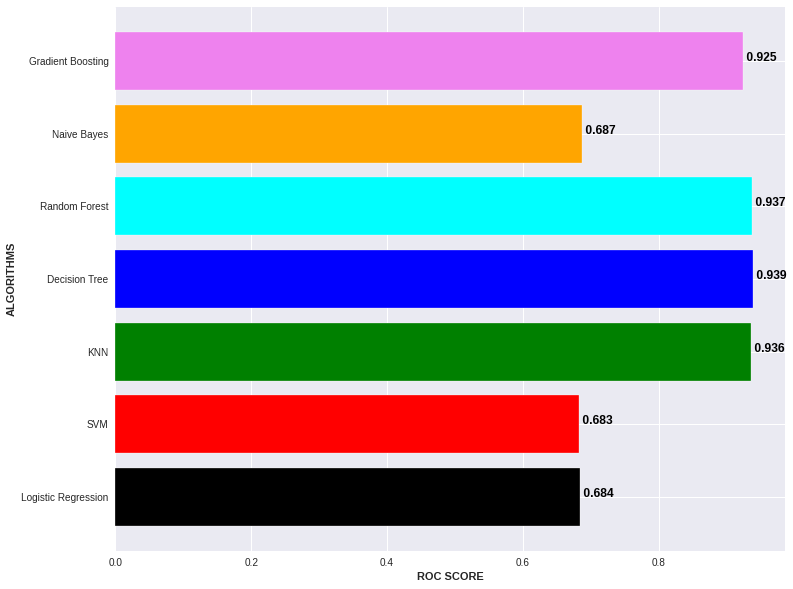

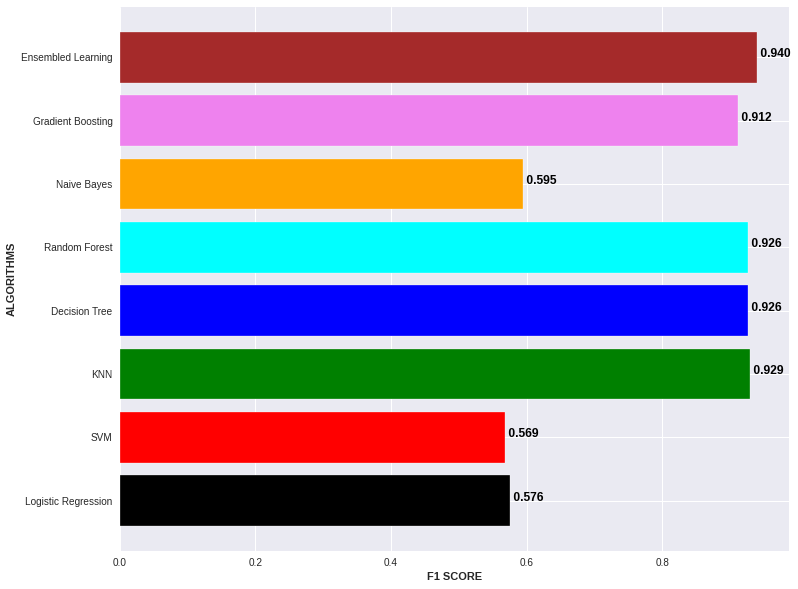

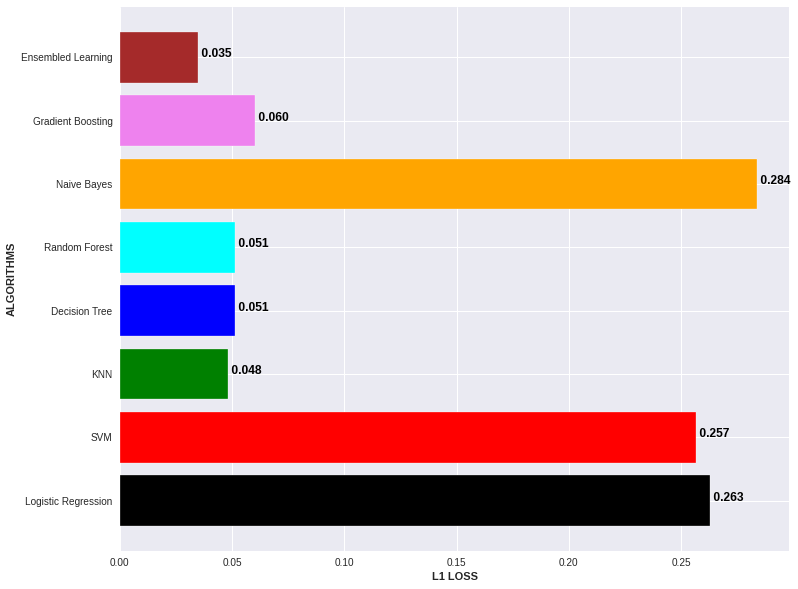

In [ ]:
def frm(n):
  #n=n*100
  s="{:.3f}".format(n)
  return " "+s

x_algos=['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Naive Bayes','Gradient Boosting','Ensembled Learning']
#lets plot the barh graph
clr=['black', 'red', 'green', 'blue', 'cyan', 'orange','violet','brown']


fig, ax = plt.subplots(figsize=(12,10))
width = 0.8
ax.barh(x_algos, acc, width, color = clr,label='Accuracy')  
plt.ylabel('ALGORITHMS', fontweight = 'bold')
plt.xlabel('ACCURACY SCORE', fontweight = 'bold')
for i, v in enumerate(acc):
    ax.text(v, i,str(frm(v)),color = 'black', fontweight = 'bold')
plt.show()
print()


fig, ax = plt.subplots(figsize=(12,10))
width = 0.8
ax.barh(x_algos, roc, width, color = clr,label='ROC')  
plt.ylabel('ALGORITHMS', fontweight = 'bold')
plt.xlabel('ROC SCORE', fontweight = 'bold')
for i, v in enumerate(roc):
    ax.text(v, i,str(frm(v)),color = 'black', fontweight = 'bold')
plt.show()
print()


fig, ax = plt.subplots(figsize=(12,10))
width = 0.8
ax.barh(x_algos, f1_scr, width, color = clr,label='F1_Score')  
plt.ylabel('ALGORITHMS', fontweight = 'bold')
plt.xlabel('F1 SCORE', fontweight = 'bold')
for i, v in enumerate(f1_scr):
    ax.text(v, i,str(frm(v)),color = 'black', fontweight = 'bold')
plt.show()
print()


fig, ax = plt.subplots(figsize=(12,10))
width = 0.8
ax.barh(x_algos, L1_loss, width, color = clr,label='L1 LOSS')  
plt.ylabel('ALGORITHMS', fontweight = 'bold')
plt.xlabel('L1 LOSS', fontweight = 'bold')
for i, v in enumerate(L1_loss):
    ax.text(v, i,str(frm(v)),color = 'black', fontweight = 'bold')
plt.show()